# Desafio 2

#### Exercício 1:  Faça a leitura inicial dos dados e explore suas informações, estude seus tipos, sua forma e apresente uma análise inicial das medidas de dispersão de seus atributos.

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as slm

# Tamanho padrões das figuras e a fonte de seus textos neste notebook
plt.rcParams['figure.figsize'] = (12, 12)
plt.rcParams['font.size'] = 14

In [2]:
dados= pd.read_csv('penguins.csv')
dados.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [4]:
print(f'Total de linhas: {dados.shape[0]}')
print(f'Total de variáveis: {dados.shape[1]}')

Total de linhas: 344
Total de variáveis: 7


In [5]:
dados.describe(include= 'all')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,333
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


In [6]:
#Checando linhas com valores nulos em culmen_lenght_mm
dados.loc[dados['culmen_length_mm'].isnull()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


Temos dois penguins com todas as variáveis numéricas e sexo faltando: Vamos optar por retirá-los do dataset por ser um número pequeno de valores faltantes.

In [7]:
#O argumento thresh nos indica em quantas variáveis a linhas precisa ter valores nulos para podermos retirá-los.
dados.dropna(thresh= 5, inplace= True)

In [8]:
#Valores faltantes em sexo
dados['sex'].isnull().sum()

9

Temos 9 valores faltantes na coluna sexo do pinguin agora. Vamos preencher esses valores usando uma regressão logística levando em conta que existem diferenças de tamanho das asas e dos bicos (profundidade também) entre machos e fêmeas.

####Logistica

In [9]:
#Instanciando objeto regressão logística
logistica = LogisticRegression()

#Dataframe sem dados nulos para fazer treino do modelo e predições
df_temp = dados.dropna()

#Treinamento do modelo e predições do modelo para os valores nulos
nulos_pred = logistica.fit(X = df_temp.drop(["sex","species", "island"], axis= 1) ,
              y = df_temp.sex ).predict(dados[dados.sex.isna()].drop(columns = ["sex","species", "island"]))

#Substituindo valores nulos pelos valores preditos
dados.loc[dados.sex.isna(), "sex"] = nulos_pred

In [10]:
print(nulos_pred)

['FEMALE' 'MALE' 'FEMALE' 'FEMALE' 'FEMALE' 'FEMALE' 'FEMALE' 'FEMALE'
 'MALE']


In [11]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            342 non-null    object 
 1   island             342 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                342 non-null    object 
dtypes: float64(4), object(3)
memory usage: 21.4+ KB


Vamos conferir como está o balanceamento das nossas variáveis categóricas: se temos muito de uma categoria e pouco de outra.

In [12]:
categoricas= ['species', 'island', 'sex']

for coluna in categoricas:
  print(dados[coluna].value_counts())
  print()

Adelie       151
Gentoo       123
Chinstrap     68
Name: species, dtype: int64

Biscoe       167
Dream        124
Torgersen     51
Name: island, dtype: int64

FEMALE    172
MALE      170
Name: sex, dtype: int64



Temos um equilíbrio entre penguins das especies Adelie e Gentoo e aqueles provenientes das Ilhas de Biscoe e Dream. Porém, temos um número relativamente menor dos penguins da espécie Chinstrap e aqueles penguins provenientes da Ilha de Torgesen.

Em termos de sexo dos pinguins temos dados bem equilibrados.

#### Exercício 2:  Imprima as matrizes de covariância e de correlação do `dataframe` e avalie as relações entre os atributos.

In [13]:
#Covariância
dados.cov()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,29.807054,-2.534234,50.375765,2605.591912
culmen_depth_mm,-2.534234,3.899808,-16.212950,-747.370093
flipper_length_mm,50.375765,-16.212950,197.731792,9824.416062
body_mass_g,2605.591912,-747.370093,9824.416062,643131.077327


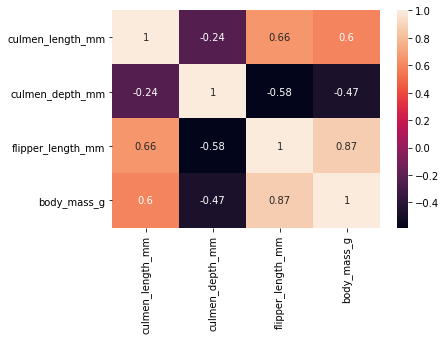

In [14]:
#Correlação
sns.heatmap(dados.corr(), annot= True);

A massa corporal do pinguin possui forte correlação positiva com o tamanho das asas e dos bicos, o que faz sentido já que teoricamento quanto maior o tamanho de uma parte do corpo do pinguin, maior será o seu peso.

Os bicos dos pinguins e as asas costumam também ter um crescimento proporcional, isto é, pinguins com asas maiores tendem a ter bicos maiores.

A maior correlação negativa se dá entre a profundidade do bico do pinguin e o tamanho da asa. À princípio, quanto maior o tamanho da Asa menor a profundidade do bico e vice versa. Neste caso é difícil perceber se há de fato algum sentido biológico neste comportamento.

#### Exercício 3: Gere gráficos de boxplots para todos os elementos numéricos do dataframe.

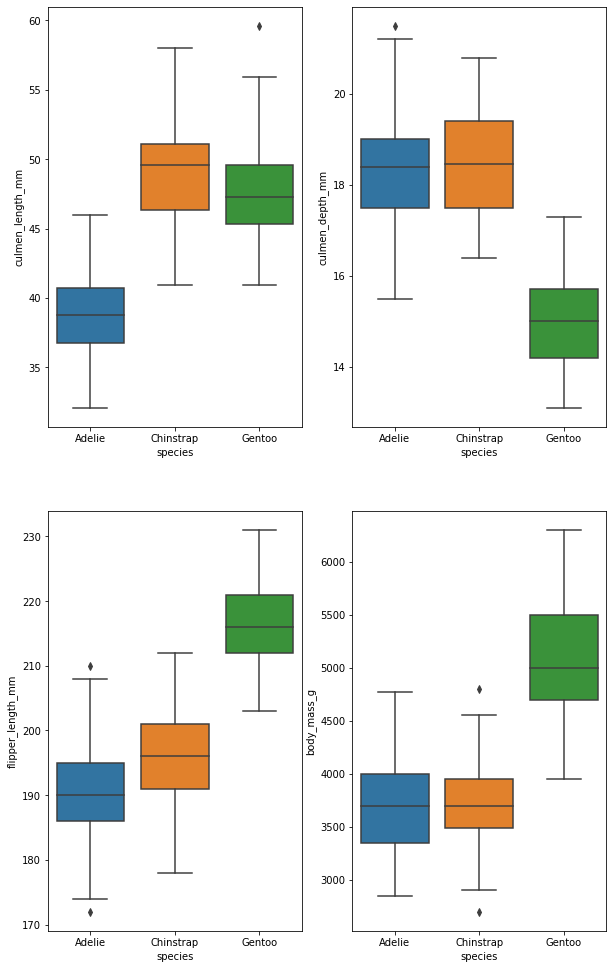

In [15]:
fig, ax = plt.subplots(2,2,figsize=(10,17))

ax_dict = {2: [0,0], 3: [0,1], 4: [1,0], 5: [1,1]}

for col in range(2, len(dados.columns)-1):
    position = ax[ax_dict[col][0], ax_dict[col][1]]
    sns.boxplot(x= 'species', y= dados.columns[col], data=  dados, ax= position);

#### Exercício 4: Plote um gráfico de dispersão entre as colunas `'body_mass_g'` e `'flipper_length_mm'`, de modo a observar a origem do animal e seu sexo. Discuta suas observações.

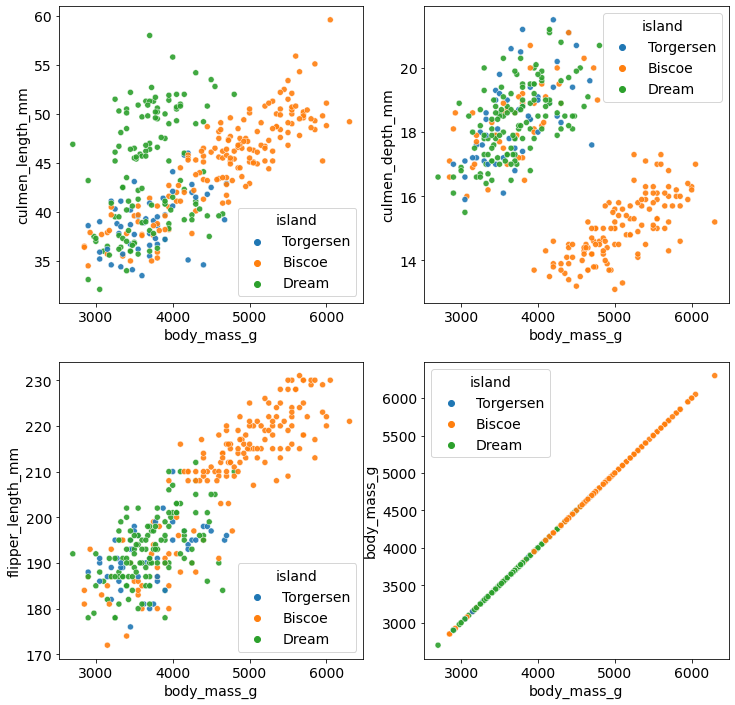

In [29]:
fig, ax = plt.subplots(2, 2)

ax_dict = {2: [0,0], 3: [0,1], 4: [1,0], 5: [1,1]}

for col in range(2, len(dados.columns)-1):
    position = ax[ax_dict[col][0], ax_dict[col][1]]
    sns.scatterplot(x= 'body_mass_g', y= dados.columns[col], data= dados, hue= 'island', alpha= 0.9, ax= position, legend= 'brief');

A ilha de Biscoe se destaca bastante em todos os atributos em comparação com as ilhas Torgersen e Dream.

O atributo culmen_lenght que diz respeito ao tamanho do bico dos pinguins já diferencia um pouco melhor os pinguins provenientes das três ilhas.

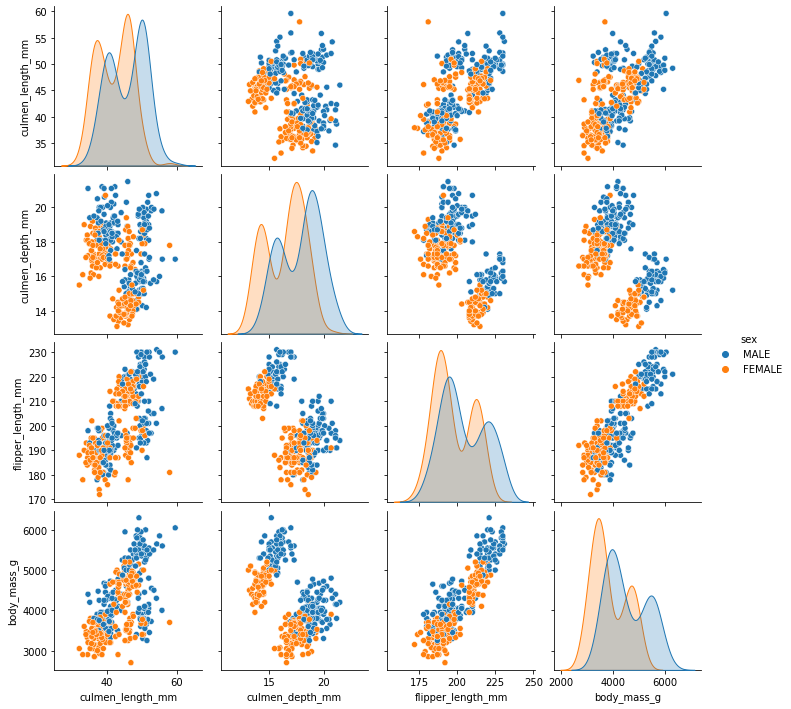

In [17]:
sns.pairplot(dados, hue='sex', height=2.5);

Ao olharmos as distribuições (diagonal do gráfico) dos atributos por sexo dos pinguins, vemos que os pinguins machos (azul) possuem medidas normalmente maiores de tamanho e profundidade dos bicos, tamanho das asas e massa corporal que as fêmeas.

#### Exercício 5: Carregue o dataframe `penguins` utilizando a função [`seaborn.load_dataset()`](https://seaborn.pydata.org/generated/seaborn.load_dataset.html), realize uma análise exploratória rápida e estude a relação entre os atributos `flipper_length_mm` e `body_mass_g`, para então propor um modelo de regressão linear simples para essa relação.

#### Plote novamente a dispersão entre `flipper_length_mm` e `body_mass_g`, juntamente com a curva de regressão e imprima os coeficientes calculados na tela.

Correlação Tamanho das Asas vs Massa Corporal -> 87.12%


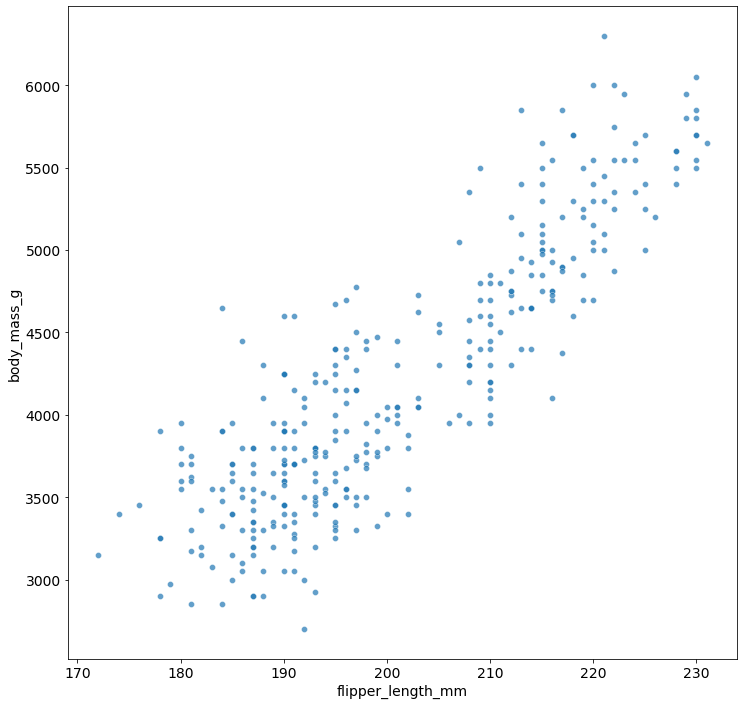

In [30]:
corr= dados[['flipper_length_mm', 'body_mass_g']].corr()['body_mass_g'][0] * 100
print(f'Correlação Tamanho das Asas vs Massa Corporal -> {corr:.2f}%')

sns.scatterplot(x= 'flipper_length_mm', y= 'body_mass_g', data = dados, alpha = 0.7);

Temos uma correlação linear bem forte. Ao investigarmos a correlação entre as características dos pinguins, a correlação positiva maior era justamente entre o tamanho da asa e a massa corporal do pinguim: aproximadamente 87% de correlação linear positiva.

In [31]:
df_penguins = dados
df_penguins_dummies = pd.get_dummies(data = df_penguins)
df_penguins_dummies.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,1,0,0,0,0,1,0,1
1,39.5,17.4,186.0,3800.0,1,0,0,0,0,1,1,0
2,40.3,18.0,195.0,3250.0,1,0,0,0,0,1,1,0
4,36.7,19.3,193.0,3450.0,1,0,0,0,0,1,1,0
5,39.3,20.6,190.0,3650.0,1,0,0,0,0,1,0,1


In [32]:
df_linear_simples= df_penguins[['flipper_length_mm', 'body_mass_g']]

In [33]:
X = df_linear_simples['flipper_length_mm'].values
X= X.reshape(-1, 1)

y = df_linear_simples['body_mass_g']

In [34]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state = 2)

In [35]:
model = LinearRegression()

model.fit(Xtrain, ytrain)

y_pred = model.predict(Xtest)

In [36]:
mae= slm.mean_absolute_error(ytest, y_pred).round(2)
mse= slm.mean_squared_error(ytest, y_pred).round(2)
rmse= np.sqrt(slm.mean_squared_error(ytest, y_pred)).round(2)
r2= slm.r2_score(ytest, y_pred).round(2)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R²: {r2}')

MAE: 314.86
MSE: 152411.11
RMSE: 390.4
R²: 0.77


#### Exercício 6: Ainda considerando o dataset `penguins.csv` considere as seguintes combinações de múltiplos atributos: 

- ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'sex'])
- ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm'])
- ['culmen_length_mm', 'culmen_depth_mm'])
- ['culmen_length_mm'])

#### e submeta os mesmos à regressão linear múltipla, comparando as métricas:

- MAE
- MSE
- RMSE
- R2

#### para cada combinação. Discuta os resultados.

In [42]:
Possibilities = [df_penguins_dummies.drop('body_mass_g', axis = 1),
                df_penguins_dummies[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'sex_MALE', 'sex_FEMALE']],
                df_penguins_dummies[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm']],
                df_penguins_dummies[['culmen_length_mm']]
                 ]

metrics = {'MAE':[],'MSE':[],'RMSE':[],'R2':[]}

In [45]:
for possibilitie in Possibilities:
    X = possibilitie
    y = df_penguins['body_mass_g']
    
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state = 1)

    model = LinearRegression()

    model.fit(Xtrain, ytrain)
    
    y_pred = model.predict(Xtest)
    import sklearn.metrics as slm
    metrics['MAE'].append(slm.mean_absolute_error(ytest, y_pred).round(2))
    metrics['MSE'].append(slm.mean_squared_error(ytest, y_pred).round(2))
    metrics['RMSE'].append(np.sqrt(slm.mean_squared_error(ytest, y_pred)).round(2))
    metrics['R2'].append(slm.r2_score(ytest, y_pred).round(2))

In [46]:
pd.DataFrame(metrics).sort_values(by = 'MAE')

,MAE,MSE,RMSE,R2
0,238.55,96847.16,311.20,0.88
1,296.30,126772.83,356.05,0.84
2,337.19,177128.52,420.87,0.78
3,571.53,495742.19,704.09,0.37


O modelo que melhor desempenho obteve e que as variáveis melhor conseguem explicar (juntas) a massa corporal dos pinguins foi aquele que levou em conta todas as características dos pinguins.

O pior modelo, por sua vez, foi aquele que buscou prever a massa corporal do pinguim somente levando em conta o tamanho do bico do pinguim.

Estes dois elementos nos indicam que todas as variáveis possuem muita influência para determinar qual é a massa corporal dos pinguins: tendo este atributo diferentes medidas de acordo com a ilha da qual vêm, o sexo e as medidas dos bicos e das asas.